# Wine quality data set



DHANUSHKA SHREE              CB.SC.I5DAS19036

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


In [ ]:
df = pd.read_csv("winequality-red.csv")        # importing the csv file
df.head()                                                # printing 1st 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5.0


In [ ]:
df.dtypes   # to know the data types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1596.000000,1599.000000,1595.000000,1593.000000
mean,8.301376,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.310940,0.658149,10.424357,5.635907
std,1.787825,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154438,0.169507,1.065965,0.807793
min,0.000000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.columns   # COLUMNS PRESENT

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info()  #information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1595 non-null   float64
 11  quality               1593 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 150.0 KB


In [ ]:
df['quality'].value_counts()

5.0    678
6.0    636
7.0    198
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [ ]:
# Looking for missing values in the dataset


In [ ]:
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      3
sulphates               0
alcohol                 4
quality                 6
dtype: int64

# 1.Handle Missing value

In [ ]:
# replacing fixed acidity's null values as 7.5

df["fixed acidity"].fillna("7.5", inplace = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5.0


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      3
sulphates               0
alcohol                 4
quality                 6
dtype: int64

In [ ]:
# remove all the rows that contain a missing value
a=df.dropna()
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5.0


# 2.Removing duplicates

In [ ]:
#no duplicate  datas to delete
a.duplicated().sum()

237

In [ ]:
# Extract duplicate rows
a.loc[a.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11,34,0.99780,3.51,0.56,9.4,5.0
27,7.9,0.430,0.21,1.60,0.106,10,37,0.99660,3.17,0.91,9.5,5.0
40,7.3,0.450,0.36,5.90,0.074,12,87,0.99780,3.33,0.83,10.5,5.0
65,7.2,0.725,0.05,4.65,0.086,4,11,0.99620,3.41,0.39,10.9,5.0
76,8.8,0.410,0.64,2.20,0.093,9,42,0.99860,3.54,0.66,10.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12,20,0.99546,3.29,0.54,10.1,5.0
1564,7.2,0.695,0.13,2.00,0.076,12,20,0.99546,3.29,0.54,10.1,5.0
1567,7.2,0.695,0.13,2.00,0.076,12,20,0.99546,3.29,0.54,10.1,5.0
1581,6.2,0.560,0.09,1.70,0.053,24,32,0.99402,3.54,0.60,11.3,5.0


In [ ]:
  # to remove duplicate values

  p=a.drop_duplicates(inplace=True)
  p

In [ ]:
a.duplicated().sum()    # since the  duplicate values is removed ,  now the count of duplicate value is 0.

0

In [ ]:
a.isna().sum()           # we have droped the null values  so isna is 0.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

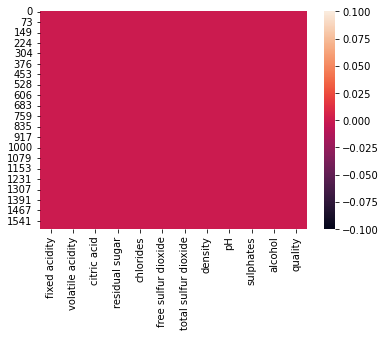

In [ ]:
sns.heatmap(a.isnull())     # graphical representaion of null values using seborn

#heatmap--- graphical representation of data that uses a system of color-coding to represent different values

#  3.Outlier Treatment

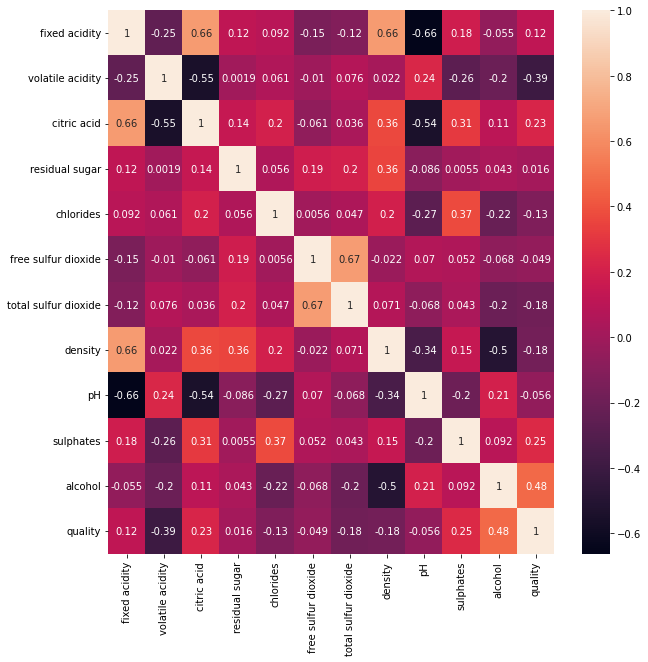

In [ ]:
plt.figure (figsize= (10,10) )
sns.heatmap (df.corr () , color= "k" , annot = True)

from the above , we can infer that density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
pH & fixed acidity has negative correlation.
density & fixed acidity has positive correlation.
citric acid & fixed acidity has positive correlation.
citric acid & volatile acidity has negative correlation.
free sulphur dioxide & total sulphur dioxide has positive correlation.

Outliers are the points outside the 1.5 or more above the third quartile or more below the first quartile.

Except for alcohol, all other features
have outliers.

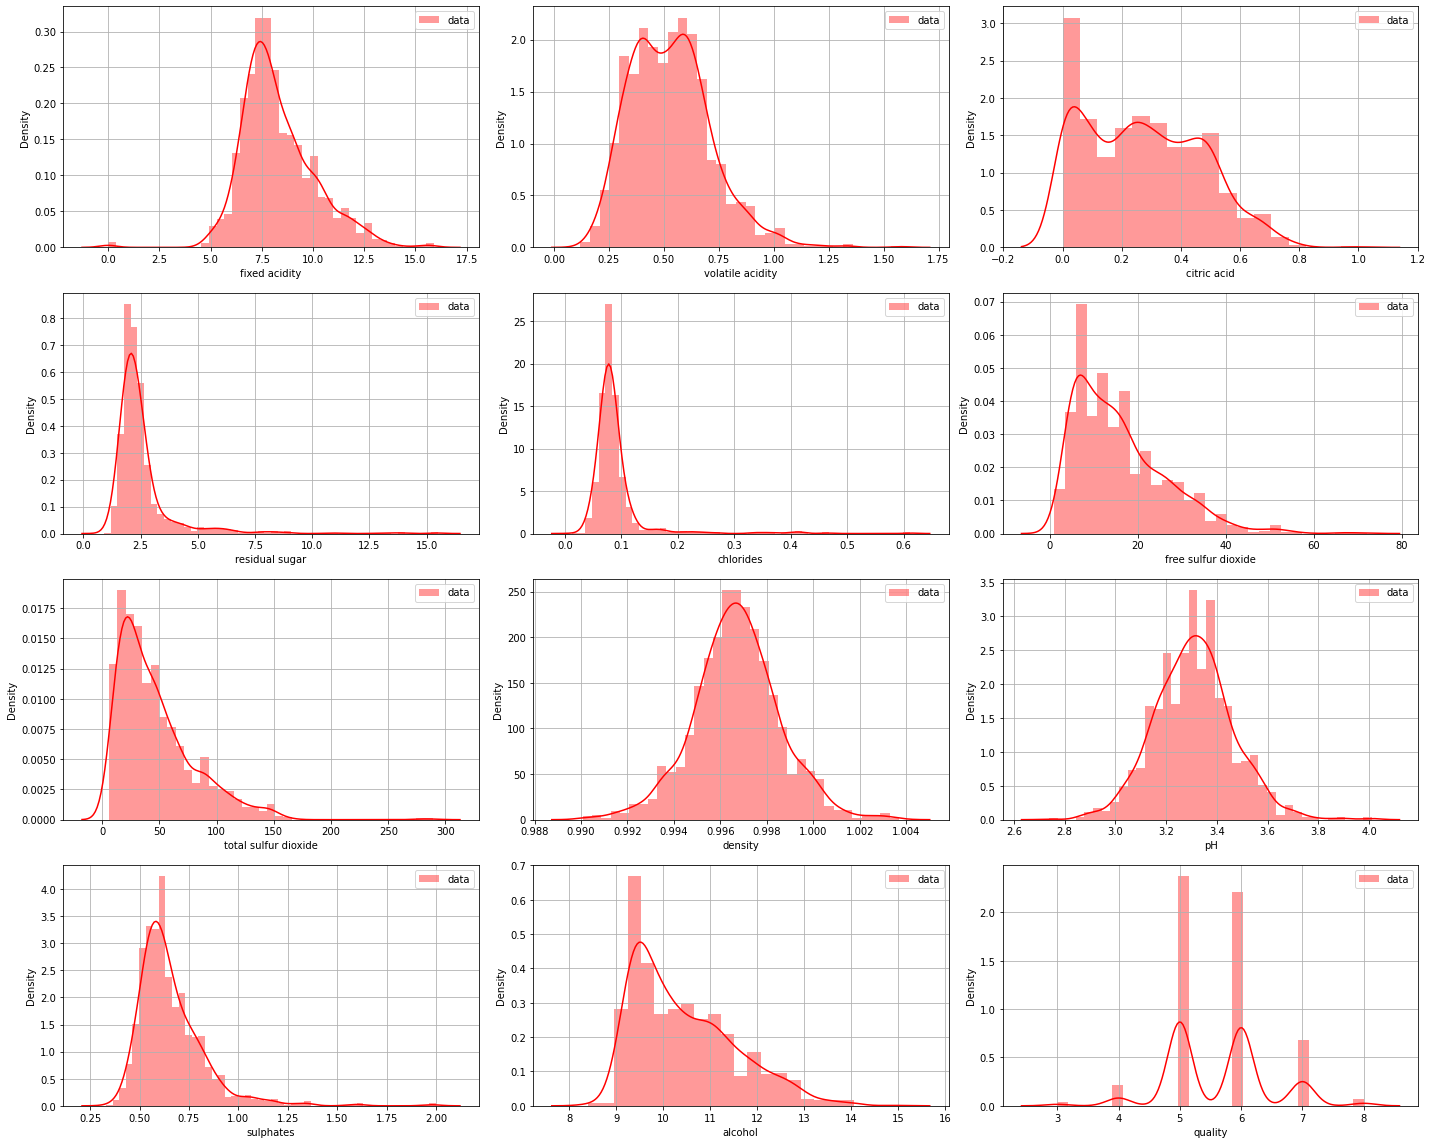

In [ ]:
plt.figure(figsize=(20,16))
for i, col in enumerate(list(a.columns.values)):
    plt.subplot(4,3,i + 1)
    sns.distplot(a[col],color='r', kde=True, label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

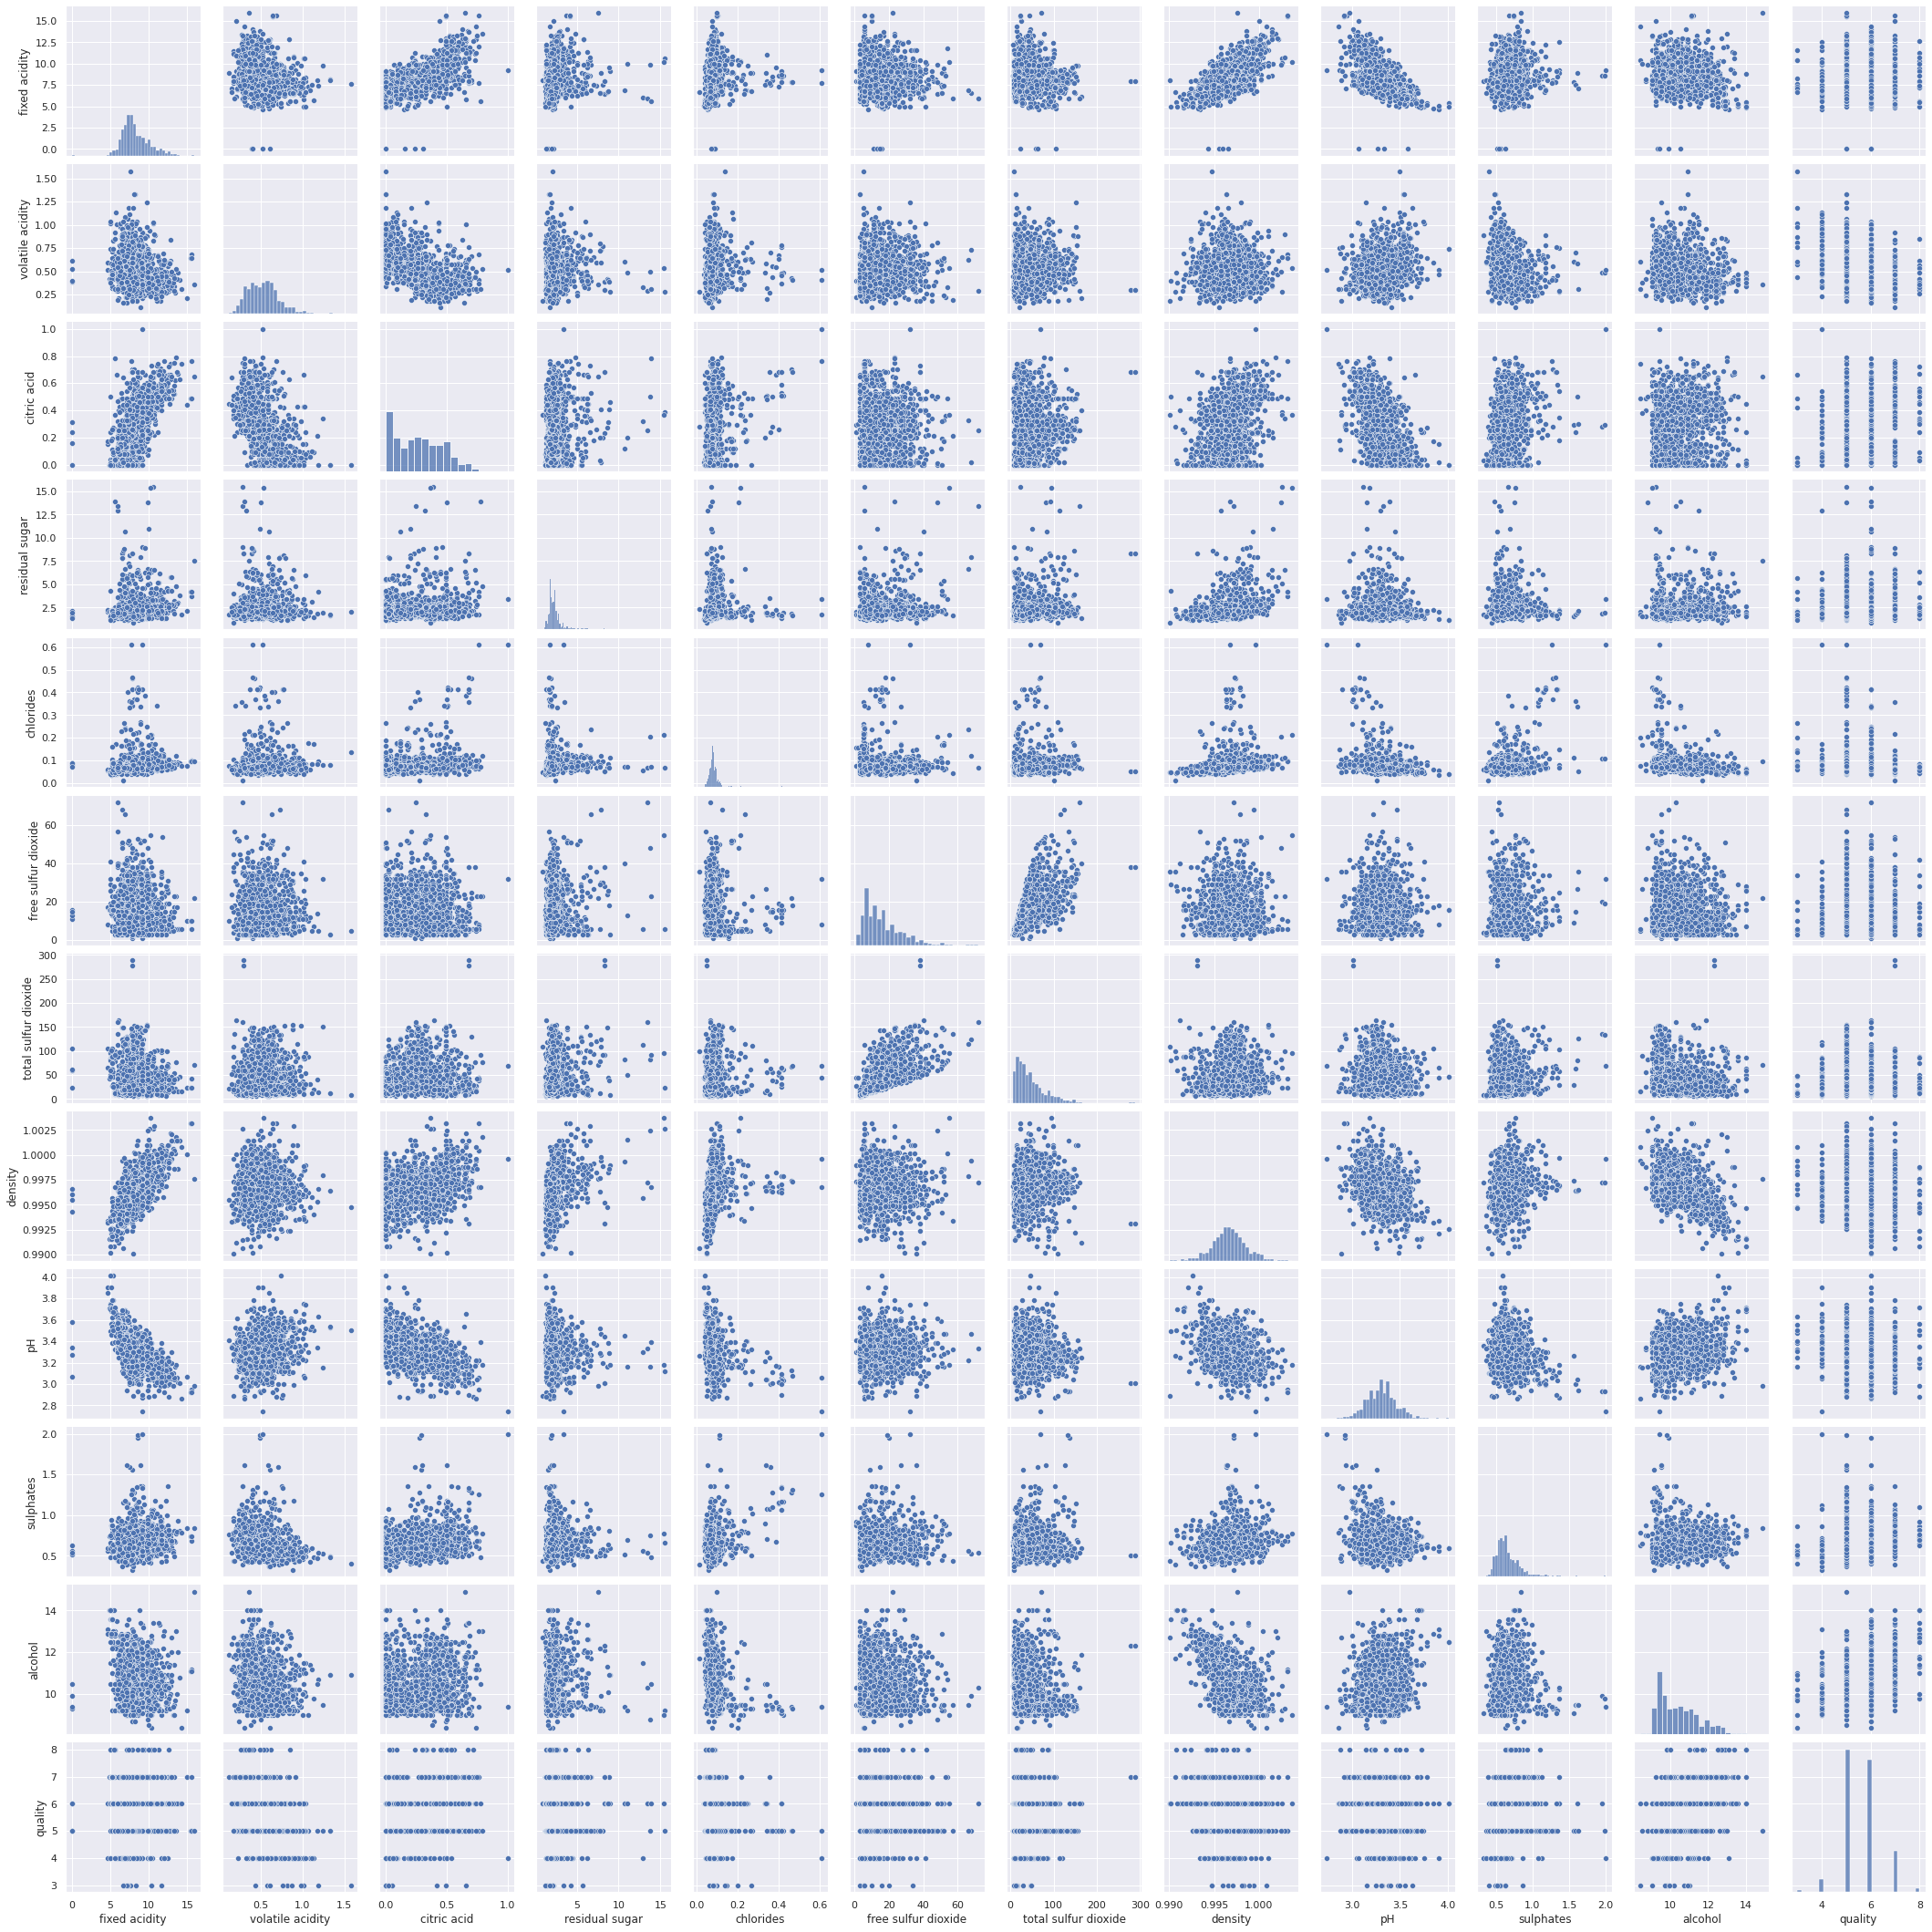

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(a.iloc[:,[i for i in range(len(a.columns))]], size = 2.5)
plt.show();


# Above pairplot shows the relationship among various features for all the possible pair of features

Above pairplot shows the relationship among various features for all the possible pair of features.

Outlier detection :

A list of the outliers of the ‘pH’ feature could be obtained using the following code:

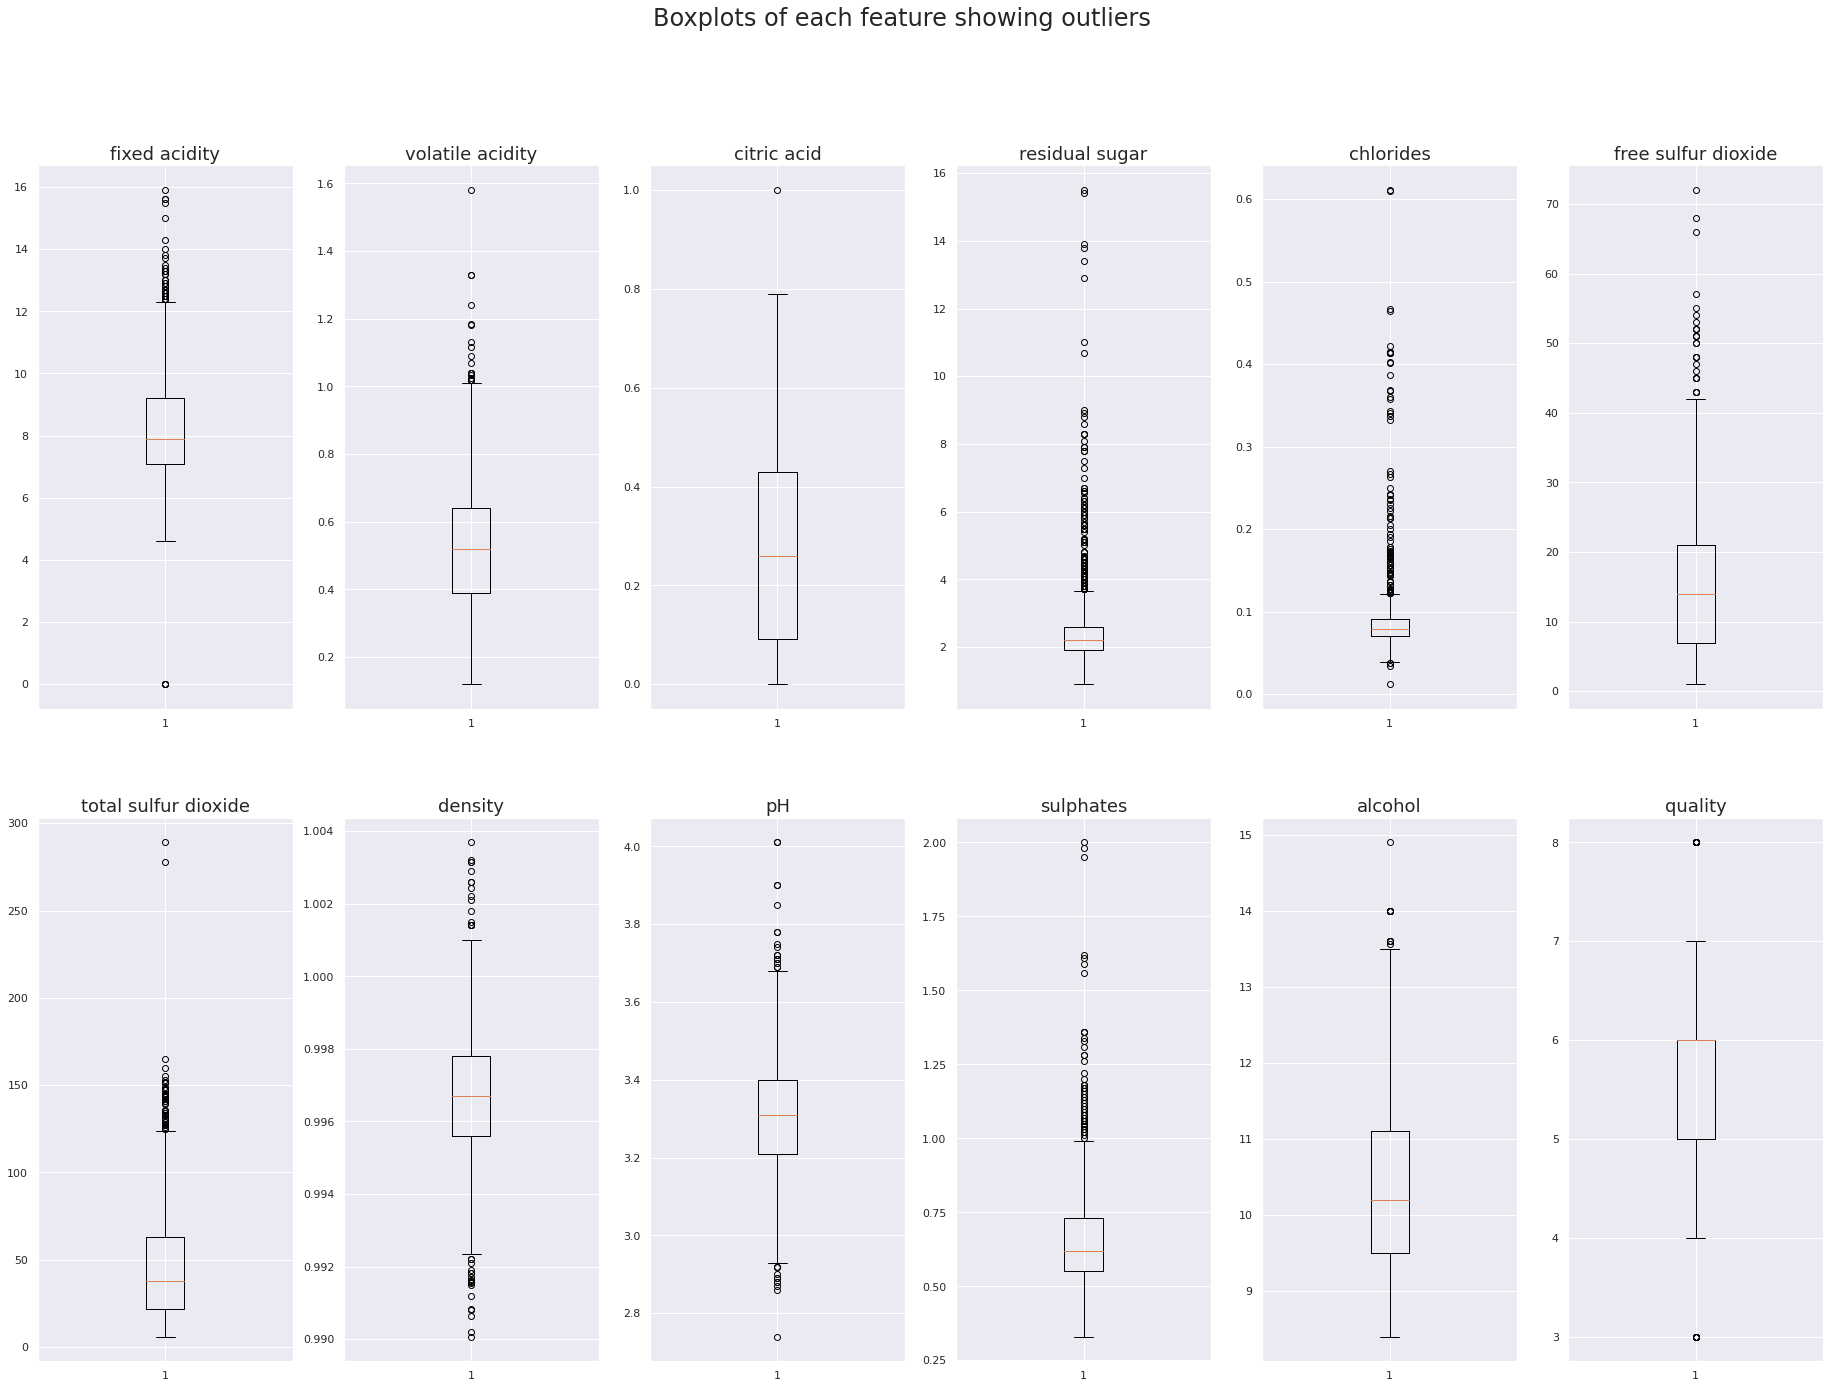

In [ ]:
plt.figure(figsize=(32,22))
plt.suptitle('Boxplots of each feature showing outliers',fontsize=24)
for i in range(1,a.shape[1]+1):
    plt.subplot(2,6,i)
    plt.boxplot(a.iloc[:,i-1])
    plt.title(a.columns[i-1],fontsize=18)

### handling outliers

###  Remove the outliers

In [ ]:
a.agg({'pH': ['mean', 'median', 'min', 'max', 'count']})

,pH
mean,3.309548
median,3.310000
min,2.740000
max,4.010000
count,1350.000000


In [ ]:
q_low = a['pH'].quantile(0.10)
print(q_low)
q_high = a['pH'].quantile(0.90)
print(q_high)

3.12
3.51


In [ ]:
a = a.drop(a[a.pH < q_low].index)

In [ ]:
a = a.drop(a[a.pH > q_high].index)

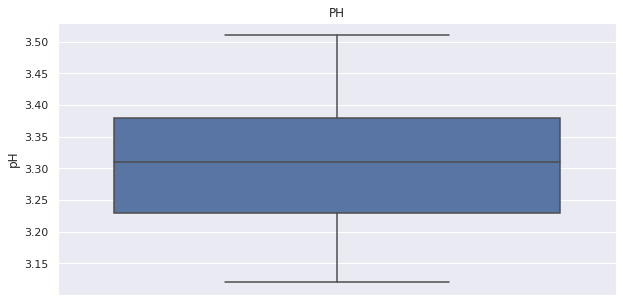

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='pH', data=a).set_title('PH')
sns.set_theme(style='white')
plt.ylabel('pH')
plt.show()

# 4.Normalizing and Scaling( Numerical Variables)

normalizing about the standard deviation

In [ ]:
def scal_norm(data):
    l=min(data)
    u=max(data)
    mn=(data).mean()
    sd=(data).std()
    normalized_val=[]
    scaled_val=[]
    for i in data:
      normalized_val.append((i-l)/(u-l))
      scaled_val.append((i-mn)/sd)
    #print(normalized_val)
    data.replace(normalized_val, inplace=True)
    #data.replace(scaled_val,inplace=True)
    return data

In [ ]:
scal_norm(a['fixed acidity'])

0        7.4
1        7.8
2        7.8
3       11.2
6        7.9
        ... 
1590     6.3
1592     6.3
1593     6.8
1594     6.2
1598     6.0
Name: fixed acidity, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['volatile acidity'])

0       0.70
1       0.88
2       0.76
3       0.28
6       0.60
        ... 
1590    0.55
1592    0.51
1593    0.62
1594    0.60
1598    0.31
Name: volatile acidity, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['citric acid'])

0       0.00
1       0.00
2       0.04
3       0.56
6       0.06
        ... 
1590    0.15
1592    0.13
1593    0.08
1594    0.08
1598    0.47
Name: citric acid, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['residual sugar'])

0       1.9
1       2.6
2       2.3
3       1.9
6       1.6
       ... 
1590    1.8
1592    2.3
1593    1.9
1594    2.0
1598    3.6
Name: residual sugar, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['chlorides'])

0       0.076
1       0.098
2       0.092
3       0.075
6       0.069
        ...  
1590    0.077
1592    0.076
1593    0.068
1594    0.090
1598    0.067
Name: chlorides, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['free sulfur dioxide'])

0       11
1       25
2       15
3       17
6       15
        ..
1590    26
1592    29
1593    28
1594    32
1598    18
Name: free sulfur dioxide, Length: 1096, dtype: int64

In [ ]:
scal_norm(a['total sulfur dioxide'])

0       34
1       67
2       54
3       60
6       59
        ..
1590    35
1592    40
1593    38
1594    44
1598    42
Name: total sulfur dioxide, Length: 1096, dtype: int64

In [ ]:
scal_norm(a['density'])

0       0.99780
1       0.99680
2       0.99700
3       0.99800
6       0.99640
         ...   
1590    0.99314
1592    0.99574
1593    0.99651
1594    0.99490
1598    0.99549
Name: density, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['pH'])

0       3.51
1       3.20
2       3.26
3       3.16
6       3.30
        ... 
1590    3.32
1592    3.42
1593    3.42
1594    3.45
1598    3.39
Name: pH, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['sulphates'])

0       0.56
1       0.68
2       0.65
3       0.58
6       0.46
        ... 
1590    0.82
1592    0.75
1593    0.82
1594    0.58
1598    0.66
Name: sulphates, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['alcohol'])

0        9.4
1        9.8
2        9.8
3        9.8
6        9.4
        ... 
1590    11.6
1592    11.0
1593     9.5
1594    10.5
1598    11.0
Name: alcohol, Length: 1096, dtype: float64

In [ ]:
scal_norm(a['quality'])

0       5.0
1       5.0
2       5.0
3       6.0
6       5.0
       ... 
1590    6.0
1592    6.0
1593    6.0
1594    5.0
1598    6.0
Name: quality, Length: 1096, dtype: float64

In [ ]:
a['pH'].value_counts()

3.30    47
3.26    45
3.38    41
3.36    41
3.32    40
3.39    39
3.34    39
3.28    37
3.31    37
3.22    35
3.35    33
3.29    33
3.27    32
3.33    31
3.40    30
3.20    30
3.37    29
3.23    29
3.15    29
3.21    28
3.16    28
3.42    27
3.44    27
3.24    27
3.41    26
3.18    24
3.17    24
3.25    23
3.19    21
3.14    19
3.12    19
3.45    18
3.46    17
3.48    16
3.43    16
3.47    15
3.50    13
3.51    12
3.13    11
3.49     8
Name: pH, dtype: int64

# 5.Encoding Categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
x=df[['quality']]
encoder =OneHotEncoder(sparse=False)
Rating_encoded = encoder.fit_transform(x)
Rating_encoded


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
feature_names = encoder.get_feature_names(input_features=["quality"])
Rating_encoded = pd.DataFrame(Rating_encoded, columns=feature_names)
Rating_encoded

,quality_3.0,quality_4.0,quality_5.0,quality_6.0,quality_7.0,quality_8.0,quality_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1594,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1595,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1597,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
Rating_encoded.describe

<bound method NDFrame.describe of       quality_3.0  quality_4.0  quality_5.0  quality_6.0  quality_7.0  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          0.0          1.0          0.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          0.0          0.0          1.0          0.0   
4             0.0          0.0          1.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
1594          0.0          0.0          1.0          0.0          0.0   
1595          0.0          0.0          0.0          1.0          0.0   
1596          0.0          0.0          0.0          1.0          0.0   
1597          0.0          0.0          1.0          0.0          0.0   
1598          0.0          0.0          0.0          1.0          0.0   

      quality_8.0  quality_nan  
0             0.0          0.0  
1             0.0      

In [ ]:
dummies = pd.get_dummies(a.quality)
dummies.head(3)

,3.0,4.0,5.0,6.0,7.0,8.0
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0


In [ ]:
df11 = pd.concat([a,dummies.drop(8.0,axis='columns')],axis='columns')
df11.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,3.0,4.0,5.0,6.0,7.0
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5.0,0,0,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5.0,0,0,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5.0,0,0,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6.0,0,0,0,1,0
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5.0,0,0,1,0,0


In [ ]:
df12 = df11.drop('quality',axis='columns')
df12.head(2)

# droped the column quality and repalce it with the keys in that

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,3.0,4.0,5.0,6.0,7.0
0,7.4,0.70,0.0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0,0,1,0,0
1,7.8,0.88,0.0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0,0,1,0,0


# 6. Variate Analysis

## univariate analysis

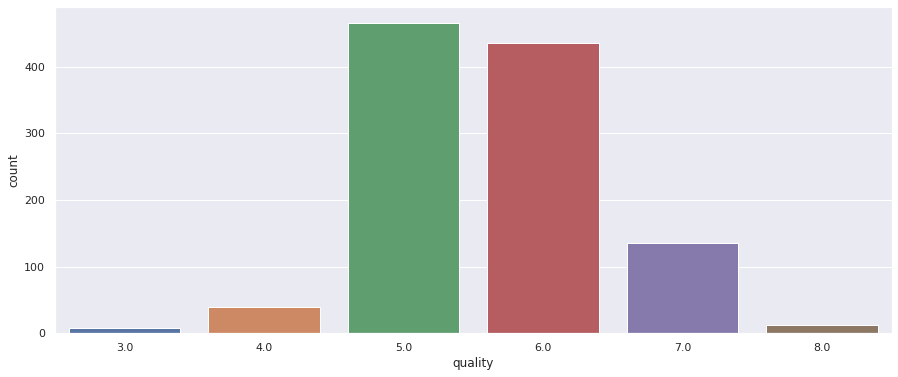

In [ ]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(a.quality)
plt.show()

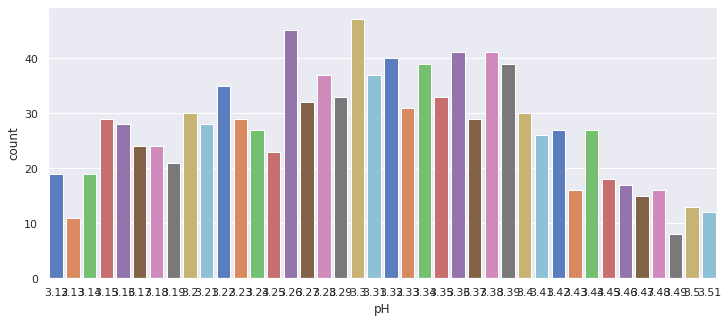

In [ ]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(a.pH,palette="muted")
plt.show()

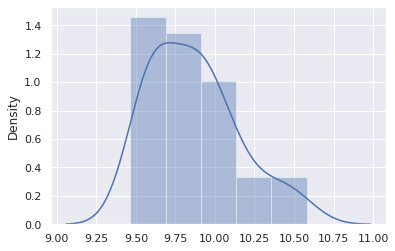

In [ ]:
df1 = a[a.quality==5.0][["pH","alcohol"]]
d = df1.groupby("pH").mean()
sns.distplot(d)
plt.show()

the alcohol content is from 9.25 to 10.75 for density 5

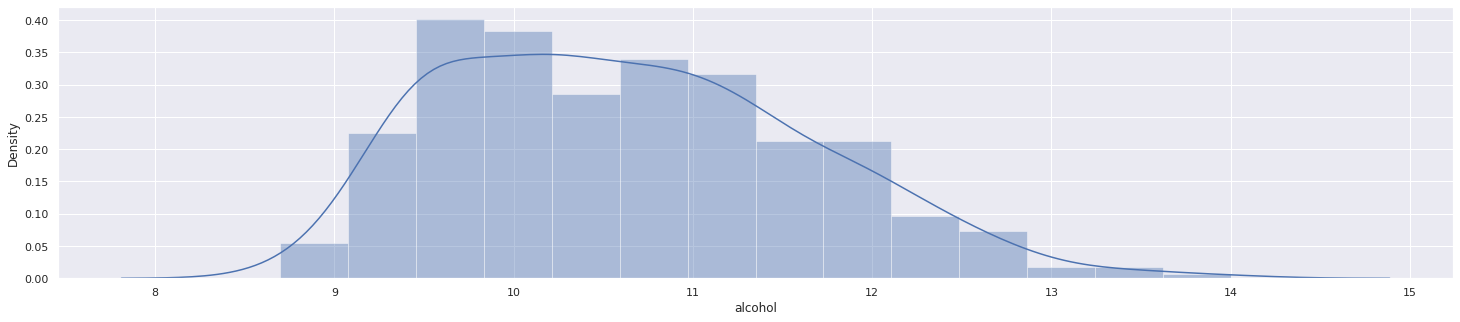

In [ ]:
df1 = a[a.quality==6.0]['alcohol']
f,ax = plt.subplots(figsize=(25,5))
ax = sns.distplot(df1)
plt.show()

the alcohol content is from 9 to 14 for density 6

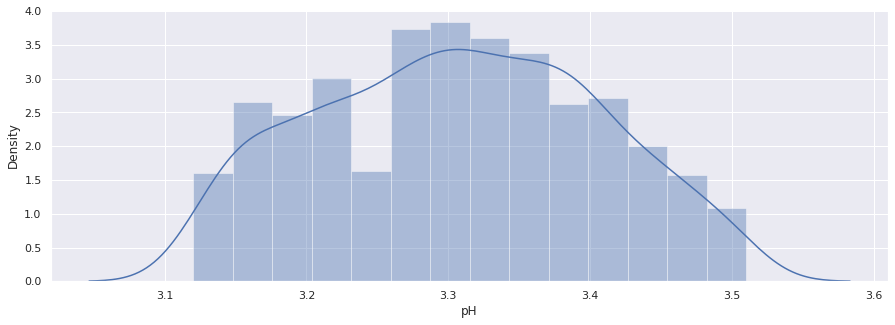

In [ ]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(a.pH)
plt.show()

the pH content is from 3.1 to 3.5

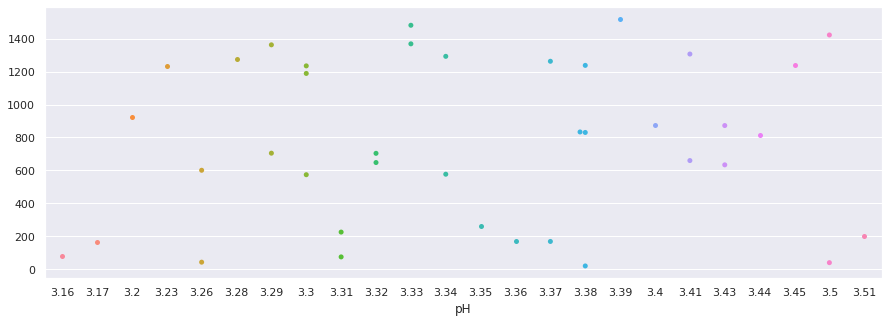

In [ ]:
df1 = a[a.quality==4.0]['pH']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("pH")
plt.show()

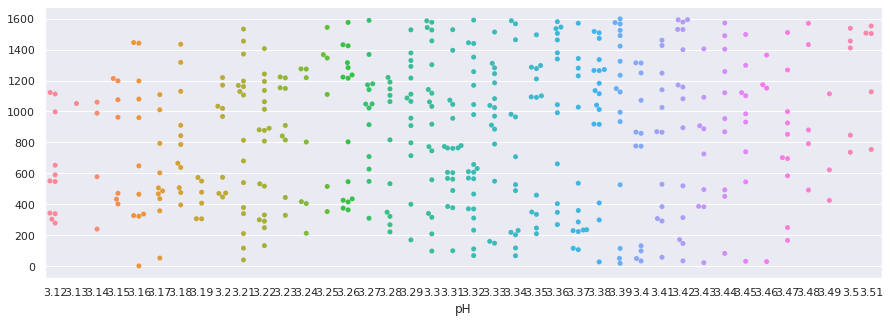

In [ ]:
df1 = a[a.quality==6.0]['pH']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("pH")
plt.show()

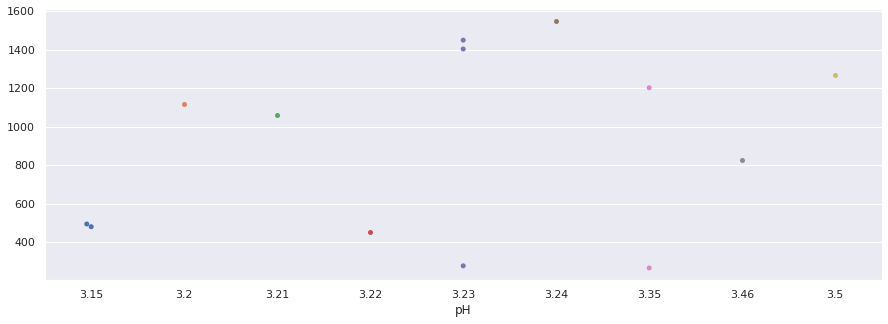

In [ ]:
df1 = a[a.quality==8.0]['pH']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("pH")
plt.show()

## Bivariate Analysis

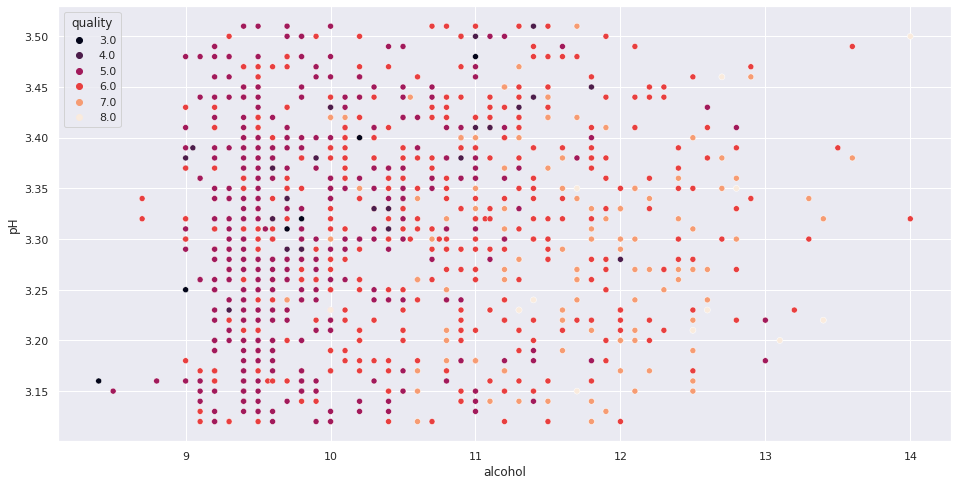

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=a.pH,x=a.alcohol,hue=a.quality, palette="rocket")
plt.show()

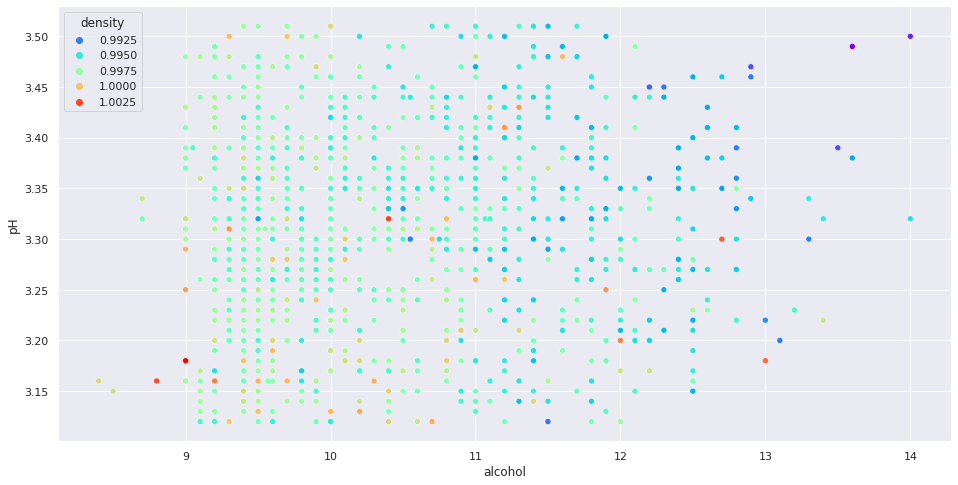

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=a.pH,x=a.alcohol,hue=a.density,palette="rainbow")
plt.show()

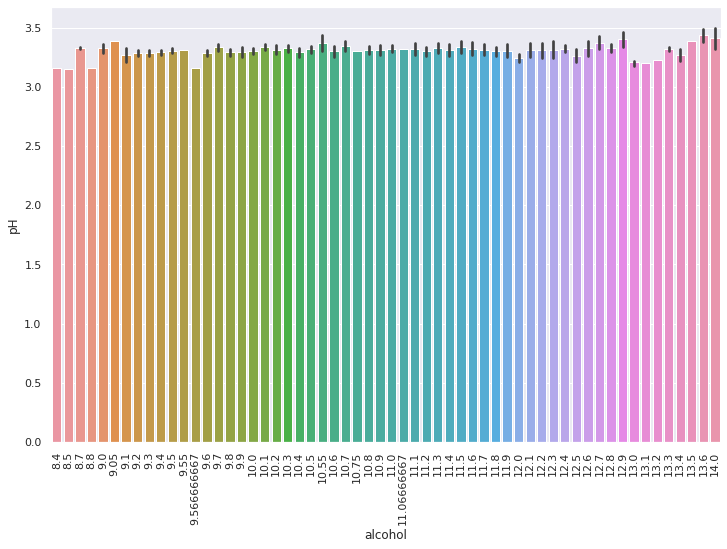

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='alcohol', y='pH', data=a)
plt.xticks(rotation=90)
plt.ylabel('pH')
plt.show()

from this graph we can infer the pH level for each alcohol level

## multivariate analysis

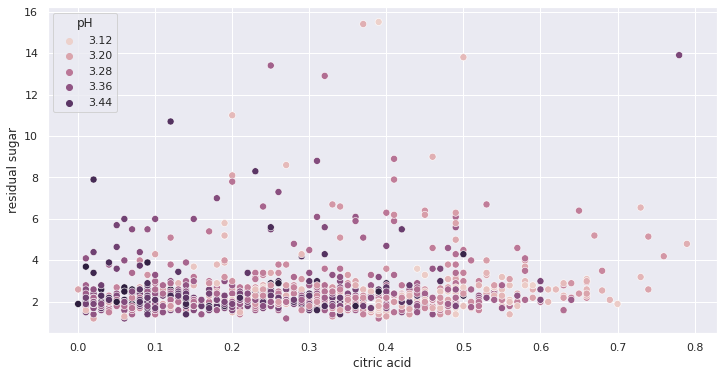

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(a['citric acid'],
               a['residual sugar'],
               hue=a['pH'],
               s=50)

we can infer the, residual sugar level for citric acid

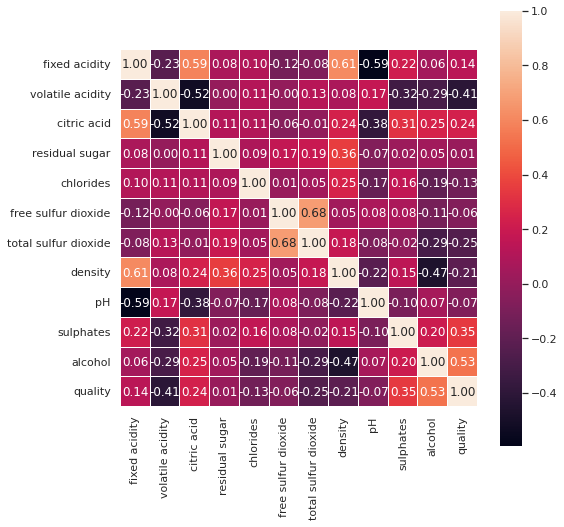

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(a.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

# 7. ml algorithm

### Regression Analysis

In [ ]:
#Defining the independent variables and dependent variables
x = a.iloc[:,[0,1,3,4,5]]
y = a['pH']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

32      3.17
237     3.37
267     3.35
1280    3.37
1474    3.16
Name: pH, dtype: float64

In [ ]:
x_train.shape

(986, 5)

## linear regresion model

In [ ]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2500528699043001

## decision tree

In [ ]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.01)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.32572803603714806

### performance metrices

In [ ]:
ls=[0.2500528699043001,0.3257280360371475]
ls2=["Linear reg","Decision Tree"]
df=pd.DataFrame(list(zip(ls2,ls)),columns=["Algorithms","Performance Values"])
df

,Algorithms,Performance Values
0,Linear reg,0.250053
1,Decision Tree,0.325728


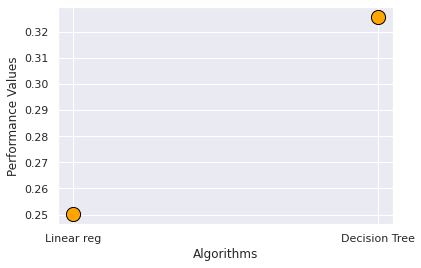

In [ ]:
df.plot.scatter(x="Algorithms",y="Performance Values",s=200,c="orange",ec="black")
plt.show()

form this we can infer that , the performance value  0.325728 of decision tree is more accurete than linear regression(0.250053)